In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Taxi_Trips.csv")

# Show basic info
print(df.shape)
df.head()


(865247, 23)


,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,NaN,NaN,8.0,8.0,...,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,NaN,NaN,24.0,8.0,...,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,NaN,NaN,56.0,NaN,...,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN
3,14aff2071ac81c6450a8f8b0e1534497da900197,de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,NaN,NaN,76.0,3.0,...,4.0,47.10,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,16d3a633e2f380cee4a7fa4677db163b6e91255d,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,NaN,NaN,8.0,3.0,...,0.0,22.82,Mobile,5 Star Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)


In [2]:

selected_columns = ['Trip Miles', 'Trip Seconds', 'Tips', 'Payment Type', 'Company', 'Trip Total']
df_model = df[selected_columns]


df_model = df_model.dropna()


X = df_model.drop('Trip Total', axis=1)
y = df_model['Trip Total']


X.head()


,Trip Miles,Trip Seconds,Tips,Payment Type,Company
0,0.09,15.0,0.00,Credit Card,City Service
1,3.00,900.0,0.00,Cash,Taxi Affiliation Services
2,5.84,711.0,4.45,Credit Card,City Service
3,13.36,1770.0,7.85,Credit Card,Sun Taxi
4,6.13,849.0,4.31,Mobile,5 Star Taxi


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Step 3.1: Identify categorical columns
categorical_features = ['Payment Type', 'Company']
numerical_features = ['Trip Miles', 'Trip Seconds', 'Tips']

# Step 3.2: Create transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # leave numeric features as-is
)

# Step 3.3: Create pipeline with preprocessor and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 3.4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.metrics import mean_absolute_error, r2_score

# Step 4.1: Train the model
model.fit(X_train, y_train)

# Step 4.2: Predict on test data
y_pred = model.predict(X_test)

# Step 4.3: Evaluate performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 5.909590864554113
R² Score: 0.3051065653734656


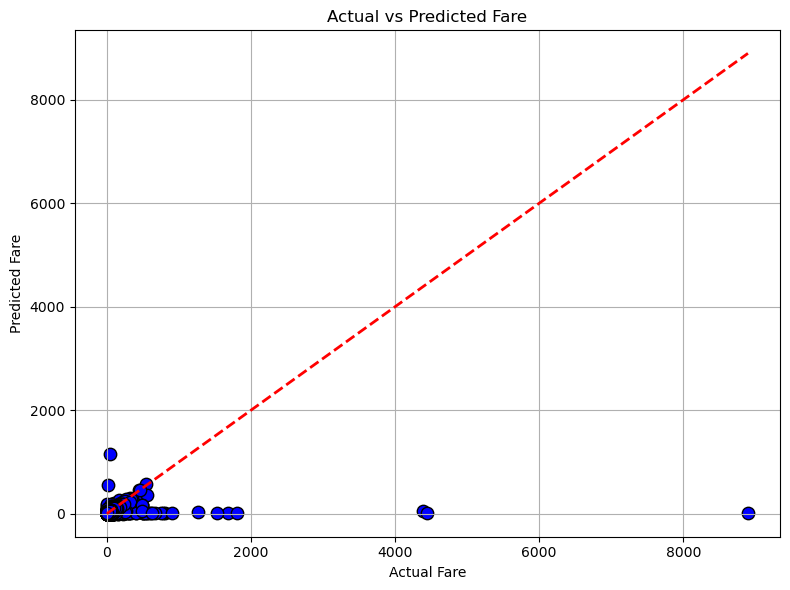

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare")
plt.grid(True)
plt.tight_layout()
plt.show()
